In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 그래프 축에서 음수 부호를 쓸 수 있게 구성
mpl.rc('axes', unicode_minus=False)
plt.rc('axes', unicode_minus=False)
plt.rc('font',family='Malgun Gothic')

### 1. 아이리스를 이용해서 모형을 살펴보자

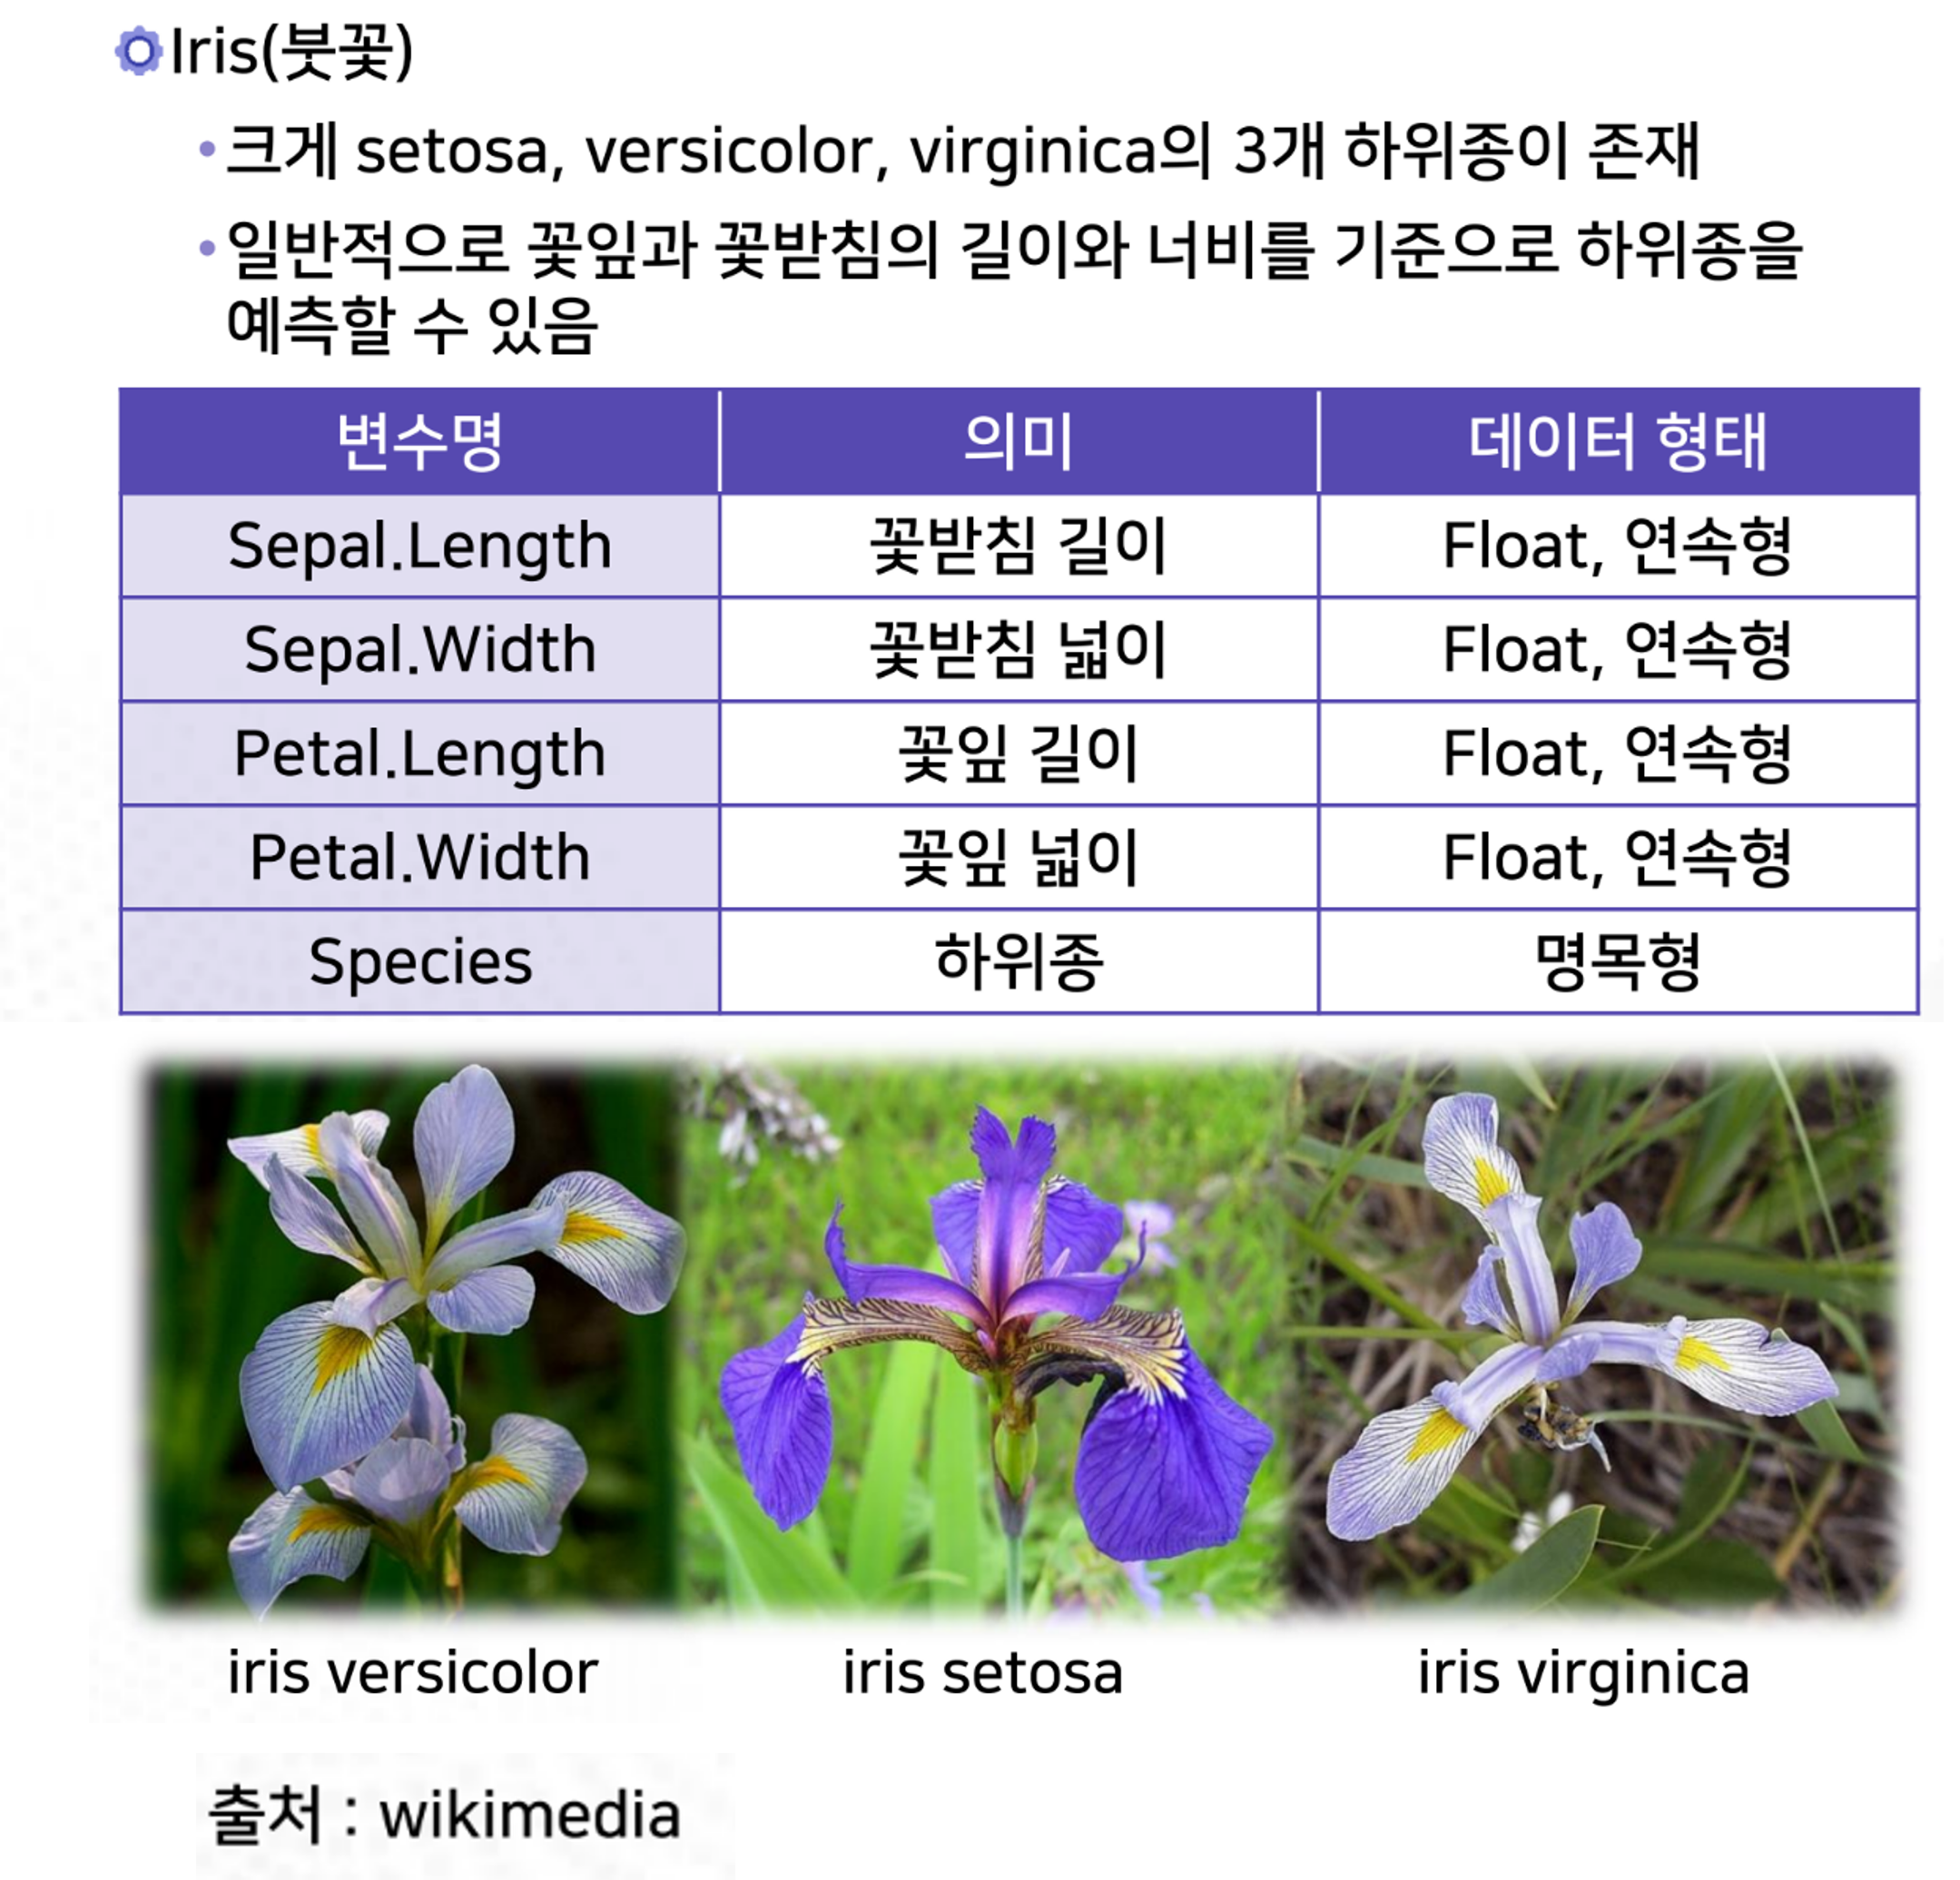

명목형 데이터 : 범주형

### 아이리스로 선형회귀,분류,회귀,클러스터 중 뭘 할수있어?

1.선형회귀 : 종속변수와 하나이상의 독립변수간의 관계를 모델링  
              ex) 꽃받침와 꽃받침 폭을 기반으로 꽃잎 길이를 예측할 수 있다. 
              
2.분류 : 여러개의 클래스 또는 범주로  분류하는 모델링  
           ex) 꽃의 종류를 예측하는 분류 모델을 구현할 수 있다. 주어진 특성값(x)을 기반으로 새개의 클래스 중 하나로 분류하는 모델  

3.클러스터 : 유사한 데이터 포인터를 그룹으로 묶는 비지도 학습  
              ex) 주어진 특성값(x)을 기반으로 비슷한 꽃들을 클러스터로 묶을 수 있다.  


- 1.선형회귀 : 종속변수와 하나이상의 독립변수간의 관계를 모델링  
              ex) 꽃받침와 꽃받침 폭을 기반으로 꽃잎 길이를 예측할 수 있다. 
              
- 데이터 로드 -> 모델 생성학습 -> 예측(predict) -> 결과 시각화              

In [13]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x=iris.data[:,0] #꽃받침 길이 , x값이 하나일때 단순선형회귀
y=iris.data[:,2] #꽃잎 길이

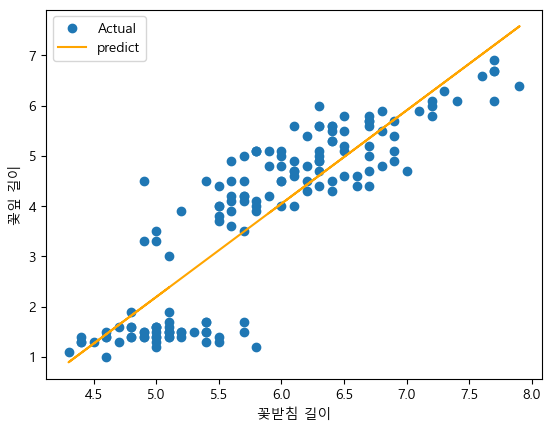

In [19]:
#선형회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(x.reshape(-1,1),y) #x값은 2차원이어야 한다

#모델 예측
y_pred = model.predict(x.reshape(-1,1))

#시각화
plt.scatter(x,y,label='Actual')
plt.plot(x,y_pred,color='orange',label='predict')

plt.xlabel("꽃받침 길이")
plt.ylabel('꽃잎 길이')

plt.legend()
plt.show()

#### 예측선으로 부터 먼 데이터는 오차가 크다 , 모델의 예측 성능이 낮다.

In [22]:
print(x.shape)
print(y.shape)

(150,)
(150,)


- 2.분류 : 여러개의 클래스 또는 범주로 분류하는 모델링  
    ex) 꽃의 종류를 예측하는 분류 모델을 구현할 수 있다. 주어진 특성값(x)을 기반으로 새개의 클래스 중 하나로 분류하는 모델

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets

#데이터 로드
iris = datasets.load_iris()
x=iris.data
y=iris.target

#데이터 분할 test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state =42)


#모델 학습 및 실행 KNeighborsClassifier(n_neighbors=3)
neigh = KNeighborsClassifier(n_neighbors=3) #https://docs.opencv.org/4.9.0/d5/d26/tutorial_py_knn_understanding.html
neigh.fit(x_train, y_train)


#예측 
y_pred = neigh.predict(x_test)


#정확도 평가 accuracy_score
acc_val = accuracy_score(y_test, y_pred)
print(acc_val)

1.0


- 3.클러스터 : 유사한 데이터 포인터를 그룹으로 묶는 비지도 학습  
    ex) 주어진 특성값(x)을 기반으로 비슷한 꽃들을 클러스터로 묶을 수 있다.

C:\Users\taeeon.kim\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


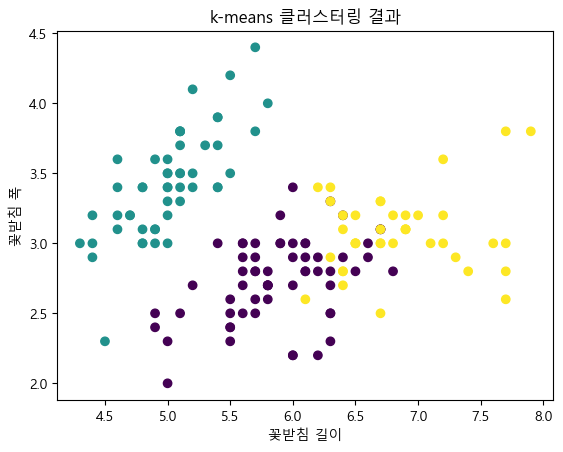

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [53]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#데이터 로드
iris = datasets.load_iris()
x=iris.data

#  K-Means 클러스터링 모델 생성 및 학습
kmeans = KMeans(n_clusters = 3,random_state=0,n_init="auto")
kmeans.fit(x)

labels = kmeans.labels_

plt.scatter(x[:,0],x[:,1],c=labels)
plt.xlabel("꽃받침 길이")
plt.ylabel('꽃받침 폭')
plt.title('k-means 클러스터링 결과')
plt.show()

labels

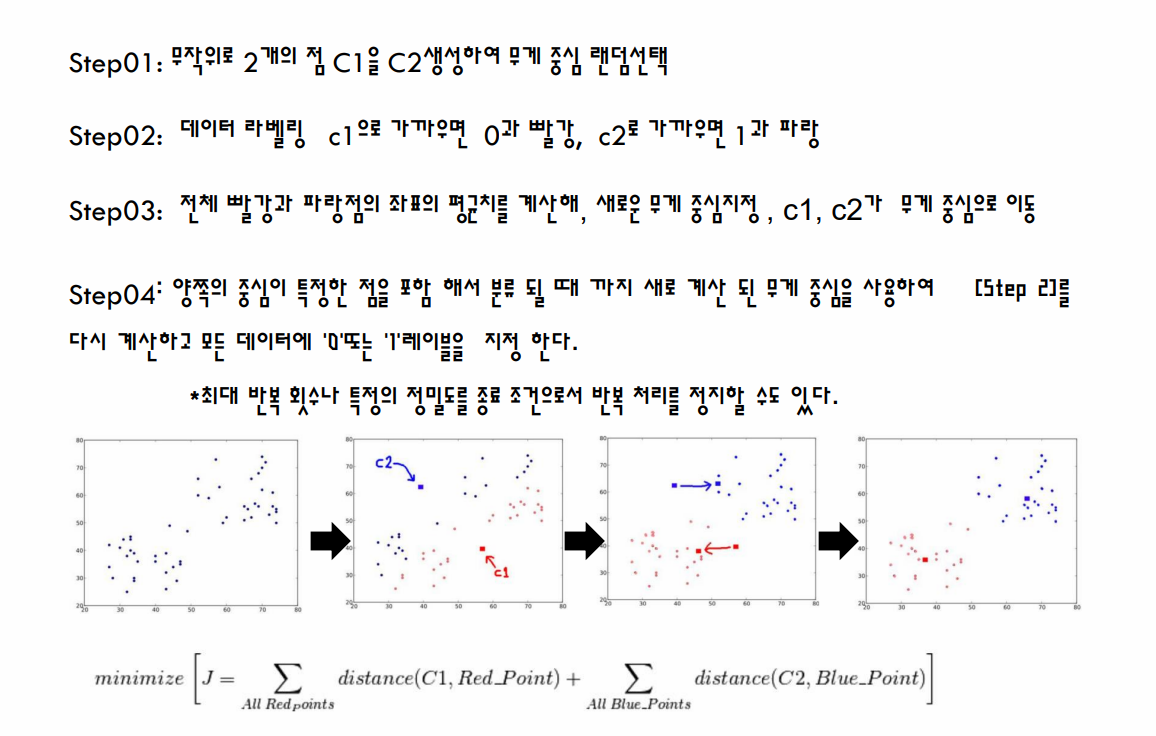

### 아이리스 데이터 셋을 활용해서 교차 검증을 한 후 최적의 모델을 선택하자

In [69]:
#6. 강력한 분류기를 추천받아 보자. 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.utils import all_estimators
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import  DecisionTreeClassifier  #기계학습 알고리즘  
from sklearn.preprocessing import StandardScaler # 전처리 (원핫인코딩,  정규화, 스케일링등 )
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import accuracy_score #평가점수
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [70]:
#데이터 로드
iris = datasets.load_iris()
x=iris.data
y=iris.target

In [75]:
models ={
    "LogisticRegression" : LogisticRegression(max_iter=200),
    "SVC" : SVC(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "KNeighborsClassifier" : KNeighborsClassifier()
}

In [76]:
for name,model in models.items():
        score = cross_val_score(model,x,y,cv=5)
        print(f'{name} : 평균 정확도 = {score.mean():.2f},표준편차 ={score.std():.2f}')

LogisticRegression : 평균 정확도 = 0.97,표준편차 =0.02
SVC : 평균 정확도 = 0.97,표준편차 =0.02
RandomForestClassifier : 평균 정확도 = 0.96,표준편차 =0.02
KNeighborsClassifier : 평균 정확도 = 0.97,표준편차 =0.02


### 교차 검증 모델 성능 평가 후 판다스로 리턴해서 순위를 보자

In [80]:
res = []
for name,model in models.items():
        clf = model
        if hasattr(clf,'score'):            
            scores = cross_val_score(clf,x,y,cv=5)
            res.append({
                    "model":name,
                    "mean accuracy" : scores.mean(),
                    "std score" : scores.std()
            })

In [82]:
res_df = pd.DataFrame(res)

top_2_model =res_df.sort_values(by='mean accuracy',ascending=False)
top_2_model

model  mean accuracy  std score
0      LogisticRegression       0.973333   0.024944
3    KNeighborsClassifier       0.973333   0.024944
1                     SVC       0.966667   0.021082
2  RandomForestClassifier       0.960000   0.032660

### 정규화 ,표준화

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris=load_iris()

print(iris.keys())
print(iris.DESCR)

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=pd.Series(iris.target)
display(df.head(10))

display(df.mean())
display(df.std())
display(df.var())

from sklearn.preprocessing import StandardScaler,MinMaxScaler

#표준화
std_scaler = StandardScaler()
std_scaler.fit(df)
std_values = std_scaler.transform(df)

df1 = pd.DataFrame(std_values,columns=df.columns)
display(df1.head(10))



display(df1.mean())
display(df1.std())
display(df1.var())

#정규화
mimx_scaler = MinMaxScaler()
mimx_scaler.fit(df)
mimx_values = mimx_scaler.transform(df)

df2 = pd.DataFrame(mimx_values,columns = df.columns)
display(df2.head(10))

display(df2.min())
display(df2.max())
display(df2.mean())



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
target               1.000000
dtype: float64

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
target               0.819232
dtype: float64

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
target               0.671141
dtype: float64

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   
5          -0.537178          1.939791          -1.169714         -1.052180   
6          -1.506521          0.788808          -1.340227         -1.183812   
7          -1.021849          0.788808          -1.283389         -1.315444   
8          -1.748856         -0.362176          -1.340227         -1.315444   
9          -1.143017          0.098217          -1.283389         -1.447076   

     target  
0 -1.224745  
1 -1.224745  
2 -1.224745  
3 -1.224745  
4 -1.224745  
5 -1.224745  
6 -1.224745  
7 -1.224745  
8 -1.224745  
9 -1.224745

sepal length (cm)   -4.736952e-16
sepal width (cm)    -7.815970e-16
petal length (cm)   -4.263256e-16
petal width (cm)    -4.736952e-16
target              -1.421085e-16
dtype: float64

sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
target               1.00335
dtype: float64

sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
target               1.006711
dtype: float64

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   
5           0.305556          0.791667           0.118644          0.125000   
6           0.083333          0.583333           0.067797          0.083333   
7           0.194444          0.583333           0.084746          0.041667   
8           0.027778          0.375000           0.067797          0.041667   
9           0.166667          0.458333           0.084746          0.000000   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
5     0.0  
6     0.0  
7     0.0  
8     0.0  
9     0.0

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
target               0.0
dtype: float64

sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
target               1.0
dtype: float64

sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
target               0.500000
dtype: float64

### 파이프라인

In [10]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest #가장 중요한 k개의 특성 추출
from sklearn.pipeline import Pipeline

iris = load_iris()
pipe = Pipeline(steps=[
  ('select', SelectKBest(k=2)),
   ('clf', LogisticRegression())])
pipe.fit(iris.data, iris.target)

pipe[:-1].get_feature_names_out() #파이프라인의 마지막 단계를 제외하고 출려되는 특성이름을 리턴하자.

array(['x2', 'x3'], dtype=object)

In [30]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

iris = load_iris()
# ColumnTransformer를 사용하여 서로 다른 처리를 각 열(특성)에 적용
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), [0, 1]),  # 첫 번째와 두 번째 특성 표준화
        #('cat', OneHotEncoder(), [2,3])  # 세 번째와 네 번째 특성 원-핫 인코딩 : 아이리스 데이터는 연속형
    ]
)

### 카이제곱 chi2 : 두 범주형 변수 사이의 독립성을 평가(통계)
#머신러닝에서 카이제곱 : 특성간의 관련성이 높은지 판단

#### 만일에 특징값이 음수일 경우 카이제곱 -> 최소값 또는 특성값에 제곱을 한다

# FeatureUnion을 사용하여 원본 특성과 SelectKBest를 통해 선택된 특성을 결합
combined_features = FeatureUnion([
    ("preprocessor", preprocessor),
    ("feat_selection", SelectKBest(score_func=chi2, k=2)) #카이제곱 (가장 관련이 있는 2개의 특성을 뽑아라!!)
])

# 최종 파이프라인 생성
pipeline = Pipeline(steps=[
    ('features', combined_features),  # 특성 결합
    ('clf', LogisticRegression())     # 분류기
])

# 파이프라인 학습
#pipeline.fit(iris.data, iris.target)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #평가점수

#데이터분할
x=iris.data
y=iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state =42)

#파이프라인 학습
pipeline.fit(x_train,y_train)

#테스트 데이터에 대한 정답률 계산
acc_val = pipeline.score(x_test,y_test)
print(acc_val)

#테스트 데이터에 대한 예측값
predict_val = pipeline.predict(x_test)
print(predict_val)


1.0
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


### <<사용자가 x값을 새로운 값으로 대입 시켜서 예측된 꽃을 판별해보자>>

In [34]:
import numpy as np

#새로운 데이터
new_data = np.array([
                     [5.1,3.5,1.4,0.2],
                     [6.0,3.2,1.2,0.5],
                     [4.9,3.9,3.0,1.1],                                            
                    ])
#파이프 라인을 사용하여 새로운 데이터의 꽃 분류 예측
new_y_pred = pipeline.predict(new_data)

#아이리스 데이터 셋의 타켓 이름을 사용하여 예측된 클래스 이름을 출력
target_name = iris.target_names
predict_class_names = target_name[new_y_pred]

print(f"예측된 꽃 분류 : {predict_class_names}")

예측된 꽃 분류 : ['setosa' 'setosa' 'setosa']


In [37]:
#https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_1_1_0.html#sphx-glr-auto-examples-release-highlights-plot-release-highlights-1-1-0-py

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression

X, y = fetch_openml(
    "titanic", version=1, as_frame=True, return_X_y=True, parser="pandas"
)
numeric_features = ["age", "fare"]
numeric_transformer = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
categorical_features = ["embarked", "pclass"]

preprocessor = ColumnTransformer(
    [
        ("num", numeric_transformer, numeric_features),
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore", sparse_output=False),
            categorical_features,
        ),
    ],
    verbose_feature_names_out=False,
)
#f_classif 특성이 카테고리형 타겟 변수와 얼마나 연관성이 있는지 계산
log_reg = make_pipeline(preprocessor, SelectKBest(k=7), LogisticRegression())
log_reg.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['embarked', 'pclass'])],
                                   verbose_feature_names_out=False)),
                ('selectkbest', SelectKBest(k=7)),
                ('logisticregression', LogisticRegression())])